In [1]:
import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
# Read data

data = pd.read_csv("COCO COLA.csv", parse_dates=["Date"], index_col="Date") 
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


In [3]:
data= data[data.index>='2016-01-01'][['Open']]
data.head()

,Open
Date,
2016-01-04,42.340000
2016-01-05,42.310001
2016-01-06,42.200001
2016-01-07,41.650002
2016-01-08,41.650002


### Resampling

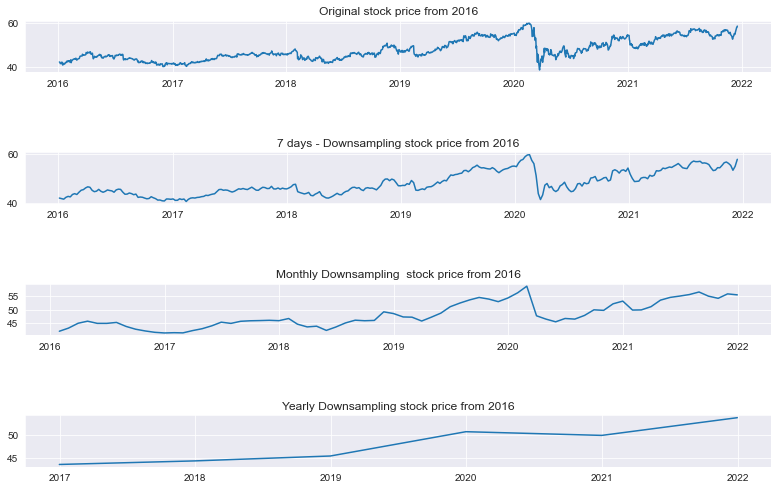

In [4]:
fig, ax = plt.subplots(4,1, figsize=(12,8)) 
ax[0].set_title('Original stock price from 2016') 
ax[0].plot(data) 
ax[1].plot(data.resample('7D').mean()) 
ax[1].set_title('7 days - Downsampling stock price from 2016') 
ax[2].plot(data.resample('M').mean()) 
ax[2].set_title('Monthly Downsampling  stock price from 2016') 
ax[3].plot(data.resample('Y').mean()) 
ax[3].set_title('Yearly Downsampling stock price from 2016') 
fig.tight_layout(pad=5.0) 
plt.show() 

### Shifting

In [5]:
data["price_lag_1"] = data["Open"].shift(1) 
data.head()

,Open,price_lag_1
Date,,
2016-01-04,42.340000,NaN
2016-01-05,42.310001,42.340000
2016-01-06,42.200001,42.310001
2016-01-07,41.650002,42.200001
2016-01-08,41.650002,41.650002


In [6]:
data["price_lag_1"] = data["Open"].shift(1, fill_value = data['Open'].mean())
data.head()

,Open,price_lag_1
Date,,
2016-01-04,42.340000,47.974234
2016-01-05,42.310001,42.340000
2016-01-06,42.200001,42.310001
2016-01-07,41.650002,42.200001
2016-01-08,41.650002,41.650002


### Optimized persistence forecasting 

In [7]:
from sklearn.metrics import mean_squared_error 
import math  
train, test = data.resample('M').mean()['Open'][0:-24], data.resample('M').mean()['Open'][-24:] 
persistence = range(1, 25) 
RMSE_scores = [] 
for p in persistence: 
    history = [x for x in train] 
    pred = [] 
    for i in range(len(test)): 
    # Prediction on test set 
        yhat = history[-p] 
        pred.append(yhat) 
    history.append(test[i]) 
    # RMSE score performance 
    rmse = math.sqrt(mean_squared_error(test, pred)) 
    RMSE_scores.append(rmse) 
    print(f'p={p} RMSE={rmse}')

p=1 RMSE=4.491395928336876
p=2 RMSE=3.9349279400485933
p=3 RMSE=4.279904207057928
p=4 RMSE=4.596603380615331
p=5 RMSE=4.15310552002015
p=6 RMSE=3.8368556199724897
p=7 RMSE=3.908843668637612
p=8 RMSE=5.034401761211634
p=9 RMSE=6.156221311108847
p=10 RMSE=7.311228641126667
p=11 RMSE=6.127112381878048
p=12 RMSE=6.063846181348495
p=13 RMSE=5.1342578079826
p=14 RMSE=4.730061082708834
p=15 RMSE=7.119435656445713
p=16 RMSE=7.219009724382379
p=17 RMSE=7.04573891427961
p=18 RMSE=7.928961466851558
p=19 RMSE=9.312774509996125
p=20 RMSE=10.46189505956539
p=21 RMSE=9.01822011343673
p=22 RMSE=9.259350169110826
p=23 RMSE=8.338668174317808
p=24 RMSE=6.526660895698311


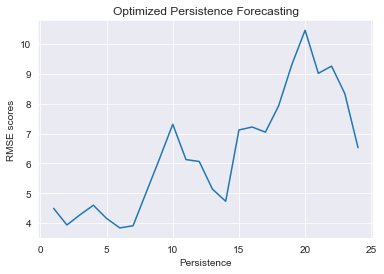

In [8]:
# plot scores over persistence values
plt.plot(persistence, RMSE_scores)
plt.title('Optimized Persistence Forecasting')
plt.xlabel('Persistence')
plt.ylabel('RMSE scores')
plt.show()

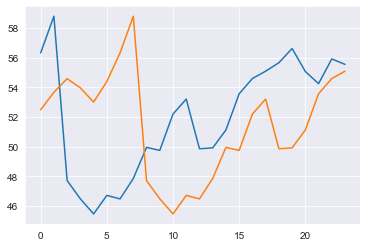

In [9]:
# Running again the persistence test with p=6
history = [x for x in train] 
pred = [] 
for i in range(len(test)): 
    # Prediction  
    yhat = history[-6] 
    pred.append(yhat) 
    history.append(test[i]) 
 
# Plots 
plt.plot(list(test)) 
plt.plot(pred) 
plt.show() 

w=1 RMSE=4.491395928336876
w=2 RMSE=4.165017501717809
w=3 RMSE=4.201791169949206
w=4 RMSE=4.290016502513144
w=5 RMSE=4.26109277996647
w=6 RMSE=4.159214262075356
w=7 RMSE=4.025524961976305
w=8 RMSE=3.876634815577158
w=9 RMSE=3.8082028916573543
w=10 RMSE=3.8419066142274207
w=11 RMSE=3.9136817895544076
w=12 RMSE=3.999441639905391
w=13 RMSE=4.0550564342686055
w=14 RMSE=4.090868183575502
w=15 RMSE=4.210541927314802
w=16 RMSE=4.333258059884894
w=17 RMSE=4.44618659928236
w=18 RMSE=4.585267351628624
w=19 RMSE=4.76673299490582
w=20 RMSE=4.9812355977095315
w=21 RMSE=5.136836154665368
w=22 RMSE=5.291857110722345
w=23 RMSE=5.406177187039983
w=24 RMSE=5.449625732364528


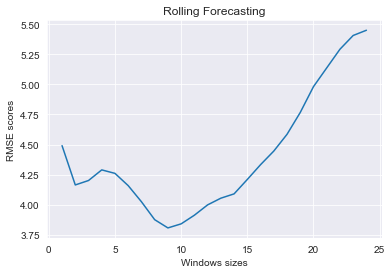

In [10]:
train, test = data.resample('M').mean()['Open'][0:-24], data.resample('M').mean()['Open'][-24:] 
window = range(1, 25) 
RMSE_scores = [] 
for w in window: 
    history = [x for x in train] 
    pred = [] 
    for i in range(len(test)): 
    # Prediction on test set 
        yhat = mean(history[-w:]) 
        pred.append(yhat) 
    history.append(test[i]) 
    # RMSE score performance 
    rmse = math.sqrt(mean_squared_error(test, pred)) 
    RMSE_scores.append(rmse) 
    print(f'w={w} RMSE={rmse}') 
 
plt.plot(window, RMSE_scores) 
plt.title('Rolling Forecasting') 
plt.xlabel('Windows sizes') 
plt.ylabel('RMSE scores') 
plt.show() 